In [1]:
import csv
import pandas as pd
import numpy as np
import json

csv.field_size_limit(100000000)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.dates as mdates
import matplotlib.ticker as tick


pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

***

# TweetsCOV19 & TweetsKB

***

In [2]:

pfad_tsv = '../data/tweetskb_liwc_risk.tsv'

tweetskb = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'is_deleted', 'liwc', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk'])
print('Shape :', tweetskb.shape)
tweetskb.head()
   

Shape : (9409841, 40)


,Tweet_Id,is_deleted,liwc,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk
0,1178791636039589889,False,"{'function': 28.57, 'prep': 11.43, 'relativ': ...",2.86,0.00,2.86,0.00,0.00,2.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00,2.86,0.00
1,1178791641265639424,True,{},0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1178791640573579264,True,{},0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1178791644797255680,True,"{'function': 23.08, 'article': 7.69, 'number':...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1178791648056217600,False,"{'function': 23.08, 'pronoun': 10.26, 'ppron':...",12.82,0.00,0.00,0.00,7.69,0.00,2.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.56,0.00,0.00,0.00,0.00,0.00,0.00,2.56,0.00,0.00,5.13,0.00,0.00,5.13,0.00,0.00


In [3]:

pfad_tsv = '../data/tweetsCov19_sample_liwc.tsv'

tweetsCov19 = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'is_deleted', 'liwc', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk'])

print('shape : ', tweetsCov19.shape)
tweetsCov19.head()

shape :  (9409841, 40)


,Tweet_Id,is_deleted,liwc,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk
0,1178791637348212736,True,"{'function': 38.46, 'pronoun': 7.69, 'ppron': ...",7.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,3.85,0.00
1,1178791641601232896,False,"{'function': 33.33, 'prep': 26.67, 'relativ': ...",6.67,0.00,0.00,0.00,0.00,3.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.33,0.00,0.00,0.00,0.00,3.33,3.33,0.00,3.33,0.00,0.00
2,1178791643509612547,False,"{'verb': 18.52, 'social': 11.11, 'percept': 3....",11.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,3.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1178791644214235137,False,"{'function': 27.27, 'prep': 13.64, 'drives': 9...",4.55,0.00,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.55,0.00,4.55,0.00,0.00
4,1178791645371875329,False,"{'adj': 8.89, 'affect': 4.44, 'posemo': 4.44, ...",6.67,2.22,2.22,0.00,0.00,4.44,6.67,2.22,2.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.44,0.00,0.00,0.00,0.00,0.00,2.22,0.00,0.00,0.00,0.00,4.44,0.00,2.22,2.22,0.00


***

In [26]:

def posted_and_deleted_Tweets_kb_Cov19(tweetskb, tweetscovid19, titel, columns):
    
    list_alle_tweetskb = tweetskb
    list_alle_tweetsCov19 = tweetscovid19
    list_monaten = columns

    x = np.arange(len(list_monaten))
    w = 0.3
    plt.rcParams["figure.figsize"] = [12,7]
    fig, ax = plt.subplots()
    
   
    ax.bar(x + w/2, list_alle_tweetskb, w, label='TweetsKB', color='darkslateblue')
    ax.bar(x - w/2, list_alle_tweetsCov19, w, label='TweetsCOV19', color='peru')

    #ax.set_ylabel('Average', fontweight="bold")
    ax.set_title(titel, fontsize=30)
    ax.set_xticks(x)
    ax.set_xticklabels(list_monaten, fontsize=30,  rotation=45)
    ax.yaxis.set_major_formatter(tick.PercentFormatter())
    #ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=30)

    ax.legend(fontsize=20)
    
    ax.set_ylim([0, 1.6])
    fig.tight_layout()
    plt.show()
    
    pfad='../plots/liwc_'+ titel +'.pdf'
    fig.savefig(pfad)

In [19]:
#cov19_del = df1[df1['is_deleted'] == True]
cov19_undel = tweetsCov19[tweetsCov19['is_deleted'] == False]
#tweetskb_del = df[df['is_deleted'] == True]
tweetskb_undel = tweetskb[tweetskb['is_deleted'] == False]

In [20]:
df_kb = tweetskb_undel[['work', 'leisure', 'home', 'money', 'relegion', 'death']]
df_cov19 = cov19_undel[['work', 'leisure', 'home', 'money', 'relegion', 'death']]

In [21]:
l_kb = df_kb.describe().iloc[1].values.tolist()
l_cov19 = df_cov19.describe().iloc[1].values.tolist()

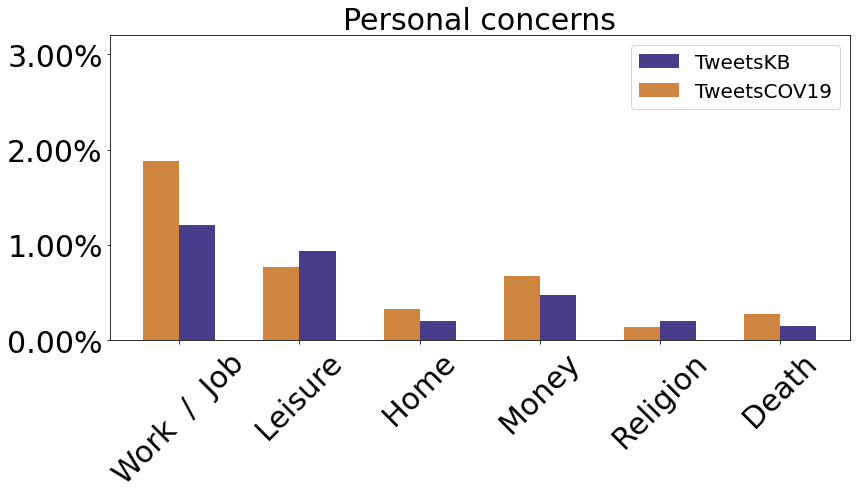

In [22]:
posted_and_deleted_Tweets_kb_Cov19(l_kb, l_cov19, 'Personal concerns',  ['Work  /  Job', 'Leisure', 'Home', 'Money', 'Religion', 'Death'])


In [23]:
df_kb = tweetskb_undel[['posemo', 'negemo', 'anx', 'anger', 'sad']]
df_cov19 = cov19_undel[['posemo', 'negemo', 'anx', 'anger', 'sad']]

In [24]:
l_kb = df_kb.describe().iloc[1].values.tolist()
l_cov19 = df_cov19.describe().iloc[1].values.tolist()

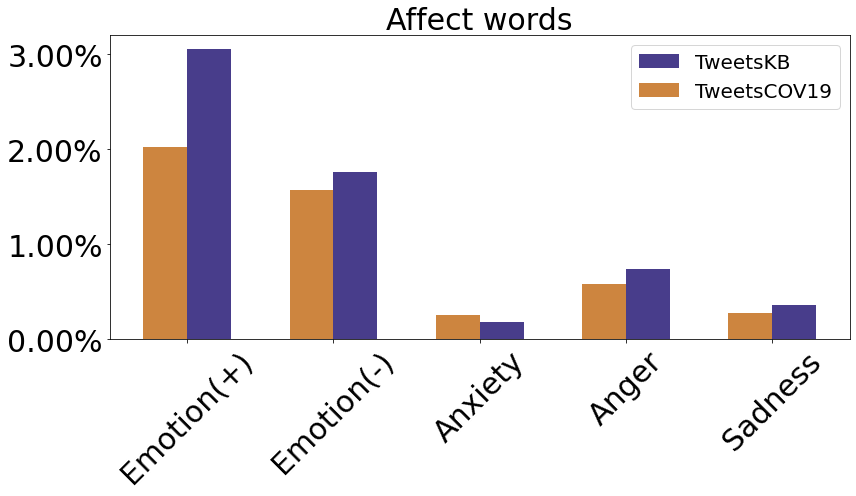

In [13]:
posted_and_deleted_Tweets_kb_Cov19(l_kb, l_cov19, 'Affect words',  ['Emotion(+)', 'Emotion(-)', 'Anxiety', 'Anger', 'Sadness'])

In [27]:
df_kb = tweetskb_undel[[ 'swear', 'netspeak', 'assent', 'nonflu', 'filler']]
df_cov19 = cov19_undel[[ 'swear', 'netspeak', 'assent', 'nonflu', 'filler']]

In [28]:
l_kb = df_kb.describe().iloc[1].values.tolist()
l_cov19 = df_cov19.describe().iloc[1].values.tolist()

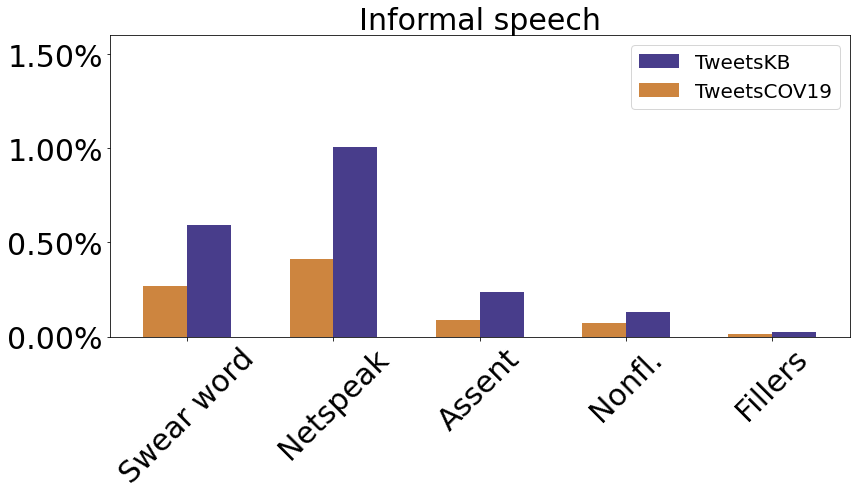

In [29]:
posted_and_deleted_Tweets_kb_Cov19(l_kb, l_cov19, 'Informal speech',  ['Swear word', 'Netspeak', 'Assent', 'Nonfl.', 'Fillers'])